In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('../data/cleaned/aggregated_dataset.csv')

dataset.head()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0


In [60]:
dataset.shape

(42000, 1027)

In [ ]:
# cir_cols = [col for col in dataset.columns if col.startswith('CIR')]

# window_size = 50

# mean_features = {}
# for start in range(0, 1016, window_size):
#     end = min(start + window_size, 1016)
#     new_col_name = f'MEAN_CIR{start}_CIR{end-1}'
#     mean_features[new_col_name] = dataset.loc[:, f'CIR{start}':f'CIR{end-1}'].mean(axis=1)

# mean_cir_df = pd.DataFrame(mean_features)

# dataset = dataset.drop(columns=cir_cols)
# dataset = pd.concat([dataset, mean_cir_df], axis=1)

# dataset



,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,MAX_NOISE,RXPACC,PREAM_LEN,...,MEAN_CIR550_CIR599,MEAN_CIR600_CIR649,MEAN_CIR650_CIR699,MEAN_CIR700_CIR749,MEAN_CIR750_CIR799,MEAN_CIR800_CIR849,MEAN_CIR850_CIR899,MEAN_CIR900_CIR949,MEAN_CIR950_CIR999,MEAN_CIR1000_CIR1015
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,967.0,611.0,1024.0,...,213.68,236.18,217.20,1582.78,2372.40,211.18,235.98,223.74,252.54,246.8125
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,1133.0,447.0,1024.0,...,168.14,201.74,201.48,248.74,4957.44,368.10,222.40,195.18,204.30,175.1875
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,894.0,723.0,1024.0,...,209.88,202.20,205.52,533.38,4910.42,888.14,343.14,201.64,221.78,179.9375
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,1127.0,1024.0,1024.0,...,282.78,250.86,249.12,285.32,3199.30,291.08,263.68,237.32,251.82,278.2500
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,1744.0,276.0,1024.0,...,197.38,206.28,213.00,1401.40,1839.96,362.00,310.60,210.68,222.64,203.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,2379.0,276.0,1024.0,...,259.48,246.42,247.58,1252.36,2587.68,601.88,297.28,233.76,245.60,213.5000
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,1810.0,281.0,1024.0,...,213.70,211.98,215.92,1293.20,3025.02,484.24,227.92,221.18,256.64,299.0625
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1092.0,1024.0,1024.0,...,303.88,286.88,240.42,566.58,1066.40,482.86,352.30,279.10,328.44,335.8750
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1077.0,1024.0,1024.0,...,232.76,238.32,275.20,821.76,752.82,192.52,231.36,230.00,237.58,222.5625


In [62]:
dataset['NLOS'].replace(1, 'NLOS', inplace=True)
dataset['NLOS'].replace(0, 'LOS', inplace=True)

dataset

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,MAX_NOISE,RXPACC,PREAM_LEN,...,MEAN_CIR550_CIR599,MEAN_CIR600_CIR649,MEAN_CIR650_CIR699,MEAN_CIR700_CIR749,MEAN_CIR750_CIR799,MEAN_CIR800_CIR849,MEAN_CIR850_CIR899,MEAN_CIR900_CIR949,MEAN_CIR950_CIR999,MEAN_CIR1000_CIR1015
0,LOS,3.90,745.0,18712.0,10250.0,11576.0,64.0,967.0,611.0,1024.0,...,213.68,236.18,217.20,1582.78,2372.40,211.18,235.98,223.74,252.54,246.8125
1,LOS,0.66,749.0,11239.0,6313.0,4712.0,64.0,1133.0,447.0,1024.0,...,168.14,201.74,201.48,248.74,4957.44,368.10,222.40,195.18,204.30,175.1875
2,NLOS,7.86,746.0,4355.0,5240.0,3478.0,60.0,894.0,723.0,1024.0,...,209.88,202.20,205.52,533.38,4910.42,888.14,343.14,201.64,221.78,179.9375
3,NLOS,3.48,750.0,8502.0,8416.0,5890.0,76.0,1127.0,1024.0,1024.0,...,282.78,250.86,249.12,285.32,3199.30,291.08,263.68,237.32,251.82,278.2500
4,LOS,1.19,746.0,17845.0,18095.0,12058.0,68.0,1744.0,276.0,1024.0,...,197.38,206.28,213.00,1401.40,1839.96,362.00,310.60,210.68,222.64,203.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,LOS,2.43,745.0,12960.0,17703.0,14948.0,96.0,2379.0,276.0,1024.0,...,259.48,246.42,247.58,1252.36,2587.68,601.88,297.28,233.76,245.60,213.5000
41996,LOS,1.39,745.0,2235.0,15089.0,8796.0,76.0,1810.0,281.0,1024.0,...,213.70,211.98,215.92,1293.20,3025.02,484.24,227.92,221.18,256.64,299.0625
41997,NLOS,5.48,747.0,7115.0,6262.0,4584.0,72.0,1092.0,1024.0,1024.0,...,303.88,286.88,240.42,566.58,1066.40,482.86,352.30,279.10,328.44,335.8750
41998,NLOS,3.40,745.0,6662.0,7683.0,5600.0,72.0,1077.0,1024.0,1024.0,...,232.76,238.32,275.20,821.76,752.82,192.52,231.36,230.00,237.58,222.5625


In [71]:
from sklearn.preprocessing import StandardScaler

# x = dataset.iloc[:, 1:].values
x = dataset.iloc[:, 1:12].values
x = StandardScaler().fit_transform(x)

x.shape

(42000, 11)

In [72]:
np.mean(x), np.std(x)

(-6.538261995306779e-16, 1.0)

In [73]:
feature_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalized_data = pd.DataFrame(x, columns=feature_cols)

In [74]:
normalized_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
41995,-0.594886,-0.145210,0.896021,1.006797,0.973403,0.808886,1.824952,-1.109168,-0.196211,0.069317,0.356883
41996,-1.036322,-0.145210,-1.092570,0.587575,-0.176021,0.126726,0.848008,-1.092870,-0.196211,-0.417025,-0.294209
41997,0.699710,0.298744,-0.187738,-0.828061,-0.962980,-0.009706,-0.384763,1.329048,-0.196211,0.438116,0.043932
41998,-0.183162,-0.145210,-0.271732,-0.600167,-0.773153,-0.009706,-0.410517,1.329048,-0.196211,0.205999,-0.198106
41999,-0.594886,0.298744,-1.020999,-0.184313,-0.645356,-0.555434,-0.158125,-0.894031,-0.196211,-0.556942,-0.486141


In [75]:
from sklearn.decomposition import PCA

pca_data = PCA(n_components=2)
pc_data = pca_data.fit_transform(x)

In [76]:
pc_data_df = pd.DataFrame(data = pc_data, columns=['PC1', 'PC2'])

pc_data_df.tail()

,PC1,PC2
41995,-1.161496,2.369298
41996,-0.756908,0.431239
41997,1.480222,-0.718861
41998,1.014423,-0.742351
41999,-0.556392,-0.832550


In [77]:
print('Explained variability per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variability per principal component: [0.39083048 0.27217786]


<Figure size 640x480 with 0 Axes>

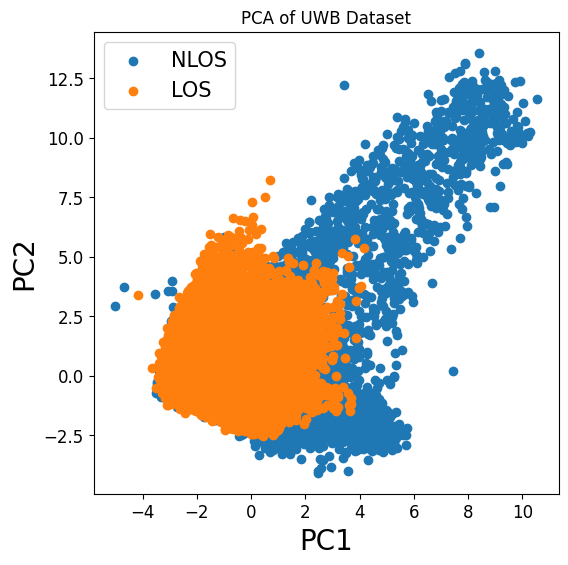

In [79]:
plt.figure()
plt.figure(figsize=(6, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('PCA of UWB Dataset')
targets = ['NLOS', 'LOS']
colors = ['g', 'r']

for target, color in zip(targets, colors):
    indicesToKeep = dataset['NLOS'] == target
    plt.scatter(pc_data_df.loc[indicesToKeep, 'PC1'], pc_data_df.loc[indicesToKeep, 'PC2'])

plt.legend(targets, prop={'size': 15})